# End to End Accelerated Discovery Short Demonstration

### Generate similar molecules to PFAS molecules with similar soluability and search patents including the generated molecules.

### Step 1: Use Deep Search to identify molecules related to PFAS and download their PubChem collection data

In [1]:
%openad set context ds4sd
df = %openadd search collection 'PubChem' for 'PFOA OR PFOS OR PFHxS OR PFNA OR HFPO-DA'


<span style="color: #090">Logged into DS4SD as </span>phil.downey1@ibm.com<span style="color: #090"> <br> 
Workspace:</span> DEFAULT <br> 


3it [00:02,  1.19it/s]                                                                                                                                        


### Step 3: load molecules into our OpenAD molecule set

In [2]:
%openad load molecules using dataframe df

<span style="color: #090">Records loaded from file : 6</span> <br> 


<span style="color: #090">Distinct molecules loaded to molecule set : 6</span> <br> 


### Step 3: From the list of molecules generate additional properties not available from Deep Search PubChem COllection and update our molecule set using Openad Model Service

In [3]:
#get list of Smiles molecules
a_list = list(set(df['SMILES'].to_list()))

#Define list of Delta to be inferred properties
properties = ['is_scaffold', 'bertz', 'tpsa', 'logp', 'qed', 'plogp', 'penalized_logp', 'lipinski', 'sas', 'esol']

# Generate SMILES properties
properties = %openadd prop get molecule property {properties} for  {a_list} 
%openadd merge molecules data using dataframe properties

Output()

### Lets Examine the available Molecules

In [4]:
mol_list = %openadd export molecules
%openad show molecules using dataframe mol_list

MolGridWidget(grid_id='show_molsgrid_df_mol_list')

In [5]:
%openad display molecule 'Perfluorononanoic acid'

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

### Step 4: For each of the molecules use Regression Transformer to to generate similar molecules with similar soluability

In [6]:
datasets = []
for row in mol_list.to_dict("records"):
    MY_SMILES= row['canonical_smiles']
    esol= float(row['esol'])
    MY_PARAMS = { "fraction_to_mask": 0.1 , "property_goal": { "<esol>": esol} }
    print("Generating Molecules for "+MY_SMILES+" with soluability:"+str(row['esol']) )
    result = %openadd gen generate with RegressionTransformerMolecules data for $MY_SMILES sample 20 using(algorithm_version=solubility  search=sample temperature=1.5 tolerance=60.0 sampling_wrapper = "$MY_PARAMS" )
    display(result)
    datasets.append(result)

Generating Molecules for O=C(O)C(F)(OC(F)(F)C(F)(F)C(F)(F)F)C(F)(F)F with soluability:-4.211602675454153


Output()

,0,1
0,O=C(O)C(F)(OC(F)(F)C(F)(F)C(F)(F)Cl)C(F)(F)F,<esol>-5.4681
1,O=C(O)C(F)(OC(F)(O)C(F)(F)C(F)(F)F)C(F)(F)F,<esol>-5.4681
2,O=C(O)C(F)(OC(F)(F)C(F)(F)C(F)(F))C(F)(F)F,<esol>-5.4681
3,O=C(O)C(F)(OC(F)(F)C(F)(F)C(F)(F)F)C(Cl)(F)C,<esol>-5.4681
4,O=C(O)C(F)(OC(F)(F)C(F)(F)C(F)(F)F)C(F)(F)I,<esol>-5.4681
5,O=C(O)C(F)(OC(F)(F)C(F)(F)C(F)F)C(F)(F)F,<esol>-5.4681
6,O=C(O)C(F)(OC(F)(F)[NH]CF)C(F)(F)F,<esol>-5.4681
7,O=C(O)C(F)(OC(F)(F)C(F)(F)C(F)(F)F)C(O)(F)F,<esol>-5.7449
8,O=C(O)C(F)(OP(F)(F)C(F)(F)C(F)(F)F)C(F)(F)F,<esol>-5.4819
9,O=C(O)C(F)(OC(F)(F)C(F)(F)C(F)(F)F)C(F)(F)Cl,<esol>-5.4681


Generating Molecules for O=C(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F with soluability:-6.5519409880260815


Output()

,0,1
0,O=C(O)C(F)(F)C(N)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,<esol>-6.852
1,O=C(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)COCF,<esol>-6.8935
2,O=C(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(O)(F)C(F)(F)C(F)(F)C(F)(F)F,<esol>-6.852
3,O=CC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,<esol>-6.8935
4,O=C(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(Cl)(F)C(F)(F)C(F)(F)C(F)(F)F,<esol>-6.852
5,O=C(N)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,<esol>-6.8935
6,O=C(P)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,<esol>-6.8935
7,O=C(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(O)C(F)(F)C(F)(F)F,<esol>-6.8935
8,O=C(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(O)F,<esol>-6.852
9,O=C(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(O)C(F)(F)C(F)(F)C(F)(F)F,<esol>-6.8935


Generating Molecules for O=C(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F with soluability:-5.7534665357831125


Output()

,0,1
0,O=C(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)Cl,<esol>-6.852
1,O=C(O)C(O)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,<esol>-5.4681
2,O=C(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F),<esol>-6.8935
3,O=C(O)C(C)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)Cl,<esol>-6.852
4,ClC(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,<esol>-6.852
5,N=C(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,<esol>-6.852
6,FC(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,<esol>-6.852
7,O=C(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(Cl)C(F)(F)F,<esol>-6.852
8,FC(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)P(F)(F)C(F)(F)C(F)(F)F,<esol>-6.852
9,C=C(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,<esol>-6.852


Generating Molecules for O=S(=O)(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F with soluability:-6.612922026752669


Output()

,0,1
0,O=S(=O)(O)C(F)(F)C(F)(F)C(F)(Cl)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,<esol>-6.852
1,O=S(=O)(O)C(F)(F)C(F)(F)C(F)(Cl)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,<esol>-6.8935
2,O=S(=O)(O)C(F)(F)C(F)(F)C(F)(Cl)C(O)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,<esol>-6.852
3,O=S(C)(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,<esol>-6.8935
4,O=S(=S)(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,<esol>-6.8935
5,O=S(=O)(O)C(F)(F)C(F)(F)C(O)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,<esol>-6.852
6,O=S(=O)(OC(F)(F))C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,<esol>-6.8935
7,O=S(=O)(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)O,<esol>-6.852
8,O=S(=O)(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)P(F)(F)F,<esol>-6.852
9,O=S(=O)(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F),<esol>-6.8935


Generating Molecules for O=S(=O)(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F with soluability:-5.0159731222667325


Output()

,0,1
0,O=S(=S)(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,<esol>-5.4681
1,O=S(=O)(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)CF,<esol>-5.4681
2,O=S(=O)(O)C(F)(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,<esol>-5.4681
3,O=S(=O)(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(O)(F)F,<esol>-5.4681
4,C=S(=O)(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(N)(F)F,<esol>-5.4681
5,S(=O)(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,<esol>-5.4681
6,O=S(=O)(O)C(F)(F)C(F)(F)C(F)(F)C(F)(Cl)C(F)(F)C(O)(F)F,<esol>-5.4681
7,O=S(=O)(O)C(F)(F)C(F)(F)C(F)(F)C(F)(O)C(F)(F)C(F)(F)F,<esol>-5.4681
8,O=S(=O)(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(Cl)C(F)(F)F,<esol>-5.4681
9,O=S(=O)(N)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(Cl)C(F)(F)F,<esol>-5.4681


Generating Molecules for O=S(=O)([O-])C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F with soluability:-4.755208830342681


Output()

,0,1
0,O=S(=O)([O-])C(F)(F)C(F)(F)C(O)(F)C(F)(F)C(F)(F)C(F)(F)F,<esol>-5.4681
1,O=S(=O)([O-])C(C)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,<esol>-5.5096
2,O=S(=O)([O-])C(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,<esol>-5.5096
3,O=S(=O)([O-])C(F)(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,<esol>-5.4681
4,O=S(=O)([O-])C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(Cl)(F)F,<esol>-5.5096
5,OS(=O)([O-])C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,<esol>-5.5096
6,OS(O)([O-])C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,<esol>-6.852
7,OP(=S)([O-])C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,<esol>-5.4819
8,O=S(=O)(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,<esol>-5.4681
9,O=S(=O)(N)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,<esol>-5.4681


### Step 5 Now lets use Deep Search to search for patents that may contain some or all of these molecules 

In [7]:
x = 0
patents_to_search=[]
patented_molecules=[]
for result in datasets:  
    for mol in result['0'].to_list():
        x = %openadd search for patents containing molecule '{mol}'
        if isinstance(x,DataFrame):
            patents_to_search.extend(x["PATENT ID"].to_list())
            patented_molecules.append(mol)

str(patents_to_search)

"['US7196121', 'US8377519', 'KR1020097000350', 'JP2009540023', 'EP7725302', 'US20040082685A1', 'US20100296038', 'US7196121', 'US20040082685A1', 'CN110759805', 'US11201306', 'EP17156902A1', 'EP18706499', 'US20200006689', 'US20220059787A1', 'US11201306', 'EP17156902A1', 'EP18706499', 'US20200006689', 'US20220059787A1']"

### Step 6: Add Patented Molecules and generate properties for new molecules

In [8]:
properties_all = ['molecular_weight', 'number_of_aromatic_rings', 'number_of_h_acceptors', 'number_of_atoms','number_of_rings', 'number_of_rotatable_bonds', 'number_of_large_rings', 'number_of_heterocycles', 'number_of_stereocenters','is_scaffold', 'bertz', 'tpsa', 'logp', 'qed', 'plogp', 'penalized_logp', 'lipinski', 'sas', 'esol']

new_props = %openadd prop get molecule property {properties_all} for {patented_molecules} 

for x in patented_molecules:
    %openad add molecule {x} Force

%openadd merge molecules data using dataframe new_props
%openad enrich molecules with analysis


Output()

<span style="color: #090">Molecule 2,2,3,3,4,4,5,5,6,6,7,7,8,8,9,9,9-heptadecafluorononan-1-ol   OCC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F was added</span> <br> 


<span style="color: #090">Molecule 2,2,3,3,4,4,5,5,6,6,7,7,8,8,8-pentadecafluorooctan-1-ol   OCC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F was added</span> <br> 


<span style="color: #090">Molecule 1,1,2,2,3,3,4,4,5,5,6,6,7,7,8,8,8-heptadecafluorooctane-1-sulfonyl fluoride   O=S(=O)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F was added</span> <br> 


<span style="color: #090">Molecule 1,1,2,2,3,3,4,4,5,5,6,6,6-tridecafluorohexane-1-sulfonamide   NS(=O)(=O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F was added</span> <br> 


<span style="color: #d00">Molecule already in list</span> <br> 


In [9]:
Full_list = %openadd export molecules
%openad show molecules using dataframe Full_list


MolGridWidget(grid_id='show_molsgrid_df_Full_list')

In [10]:
%openad tell me how to perform retrosynthesis with details and examples

Output()

<span style="color: #090">Question:</span> <span style="color: #dc0"> Tell me how to perform retrosynthesis with details and examples</span> <br> 
 `  <br> 
predict retrosynthesis '<smiles>' [ using (availability_pricing_threshold=<int> available_smiles='<smiles>.<smiles>.<smiles>' exclude_smiles='<smiles>.<smiles>.<smiles>' exclude_substructures='<smiles>.<smiles>.<smiles>' exclude_target_molecule=<boolean> fap=<float> max_steps=<int> nbeams=<int> pruning_steps=<int> ai_model='<model_name>') ]`  <br> 
-  `<smiles>` : Represents the SMILES notation of the molecule for retrosynthesis prediction. <br> 
-  `availability_pricing_threshold=<int>` : Sets the maximum price in USD per g/ml of compounds. Default: no threshold. <br> 
-  `available_smiles='<smiles>.<smiles>.<smiles>'` : Lists molecules available as precursors, delimited with a period. <br> 
-  `exclude_smiles='<smiles>.<smiles>.<smiles>'` : Lists molecules to exclude from the set of precursors, delimited with a period. <br> 
-  `exclude_substructures='<smiles>.<smiles>.<smiles>'` : Lists substructures to exclude from the set of precursors, delimited with a period. <br> 
-  `exclude_target_molecule=<boolean>` : Excludes the target molecule. Default is True. <br> 
-  `fap=<float>` : Evaluates each retrosynthetic step with Forward Confidence. Retains steps where forward confidence is greater than the FAP value. Default is 0.6. <br> 
-  `max_steps=<int>` : Specifies the maximum number of steps in the results. Default is 3. <br> 
-  `nbeams=<int>` : Sets the maximum number of beams exploring the hypertree. Default is 10. <br> 
-  `pruning_steps=<int>` : Defines the number of steps to prune a hypertree. Default is 2. <br> 
-  `ai_model='<model_name>'` : Specifies the AI model to use. Use  `list rxn models`  to see available models. Default is '2020-07-01'. <br> 

**Example:** <br> 
 ` ` <br> 
`predict retrosynthesis 'BrCCc1cccc2c(Br)c3ccccc3cc12' using (max_steps=3)`  <br> 


In [11]:
%openad set context rxn

<span style="color: #090">logging into RXN as: </span> phil.downey1@ibm.com <br> 
 <span style="color: #090">Workspace: </span> DEFAULT <br> 


RXN Project has been set to DEFAULT for this Workspace

<span style="color: #090">You successfully logged in to <span style="color: #dc0">RXN</span></span> <br> 
<span style="color: #ccc">Your access token does not have an expiration date</span> <br> 


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

<span style="color: #090">Target Molecule:</span> NS(=O)(=O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F <br> 


Output()

Output()

###  <span style="color: #090">Showing path </span> 0 <span style="color: #090"> with confidence </span>0.993: <br> 


<span style="color: #090"> Reaction: </span>ClCCl + N + O=S(=O)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F --->> NS(=O)(=O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F <br> 


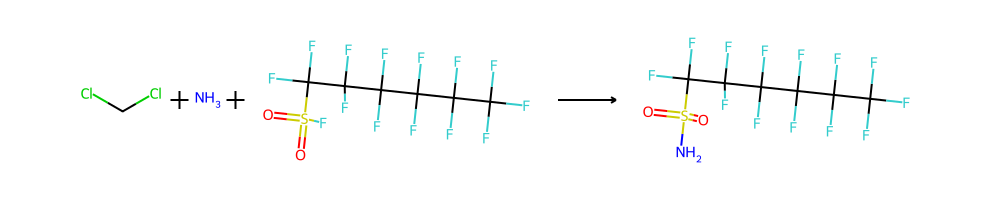

###  <span style="color: #090">Showing path </span> 1 <span style="color: #090"> with confidence </span>0.993: <br> 


<span style="color: #090"> Reaction: </span>N + O=S(=O)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F --->> NS(=O)(=O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F <br> 


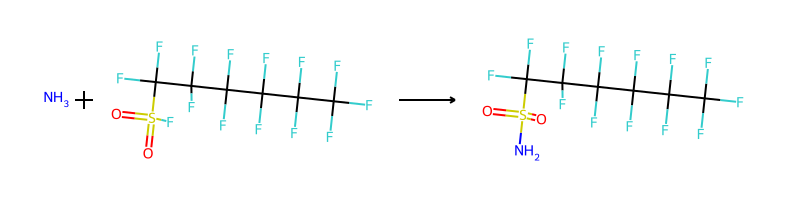

###  <span style="color: #090">Showing path </span> 2 <span style="color: #090"> with confidence </span>0.992: <br> 


<span style="color: #090"> Reaction: </span>N + O + O=S(=O)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F --->> NS(=O)(=O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F <br> 


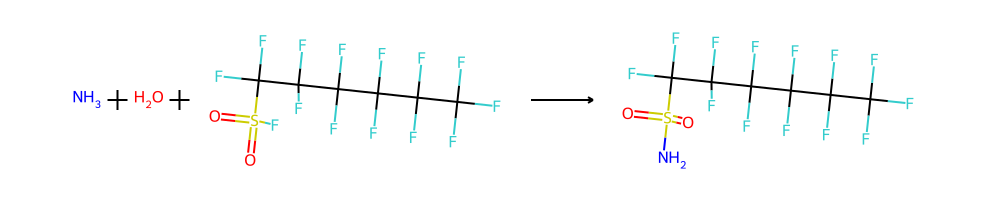

###  <span style="color: #090">Showing path </span> 3 <span style="color: #090"> with confidence </span>0.989: <br> 


<span style="color: #090"> Reaction: </span>O=S(=O)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F + [NH4+].[OH-] --->> NS(=O)(=O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F <br> 


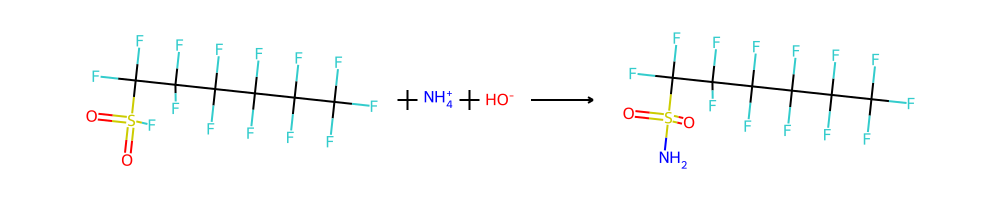

###  <span style="color: #090">Showing path </span> 4 <span style="color: #090"> with confidence </span>0.985: <br> 


<span style="color: #090"> Reaction: </span>CCOCC + N + O=S(=O)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F --->> NS(=O)(=O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F <br> 


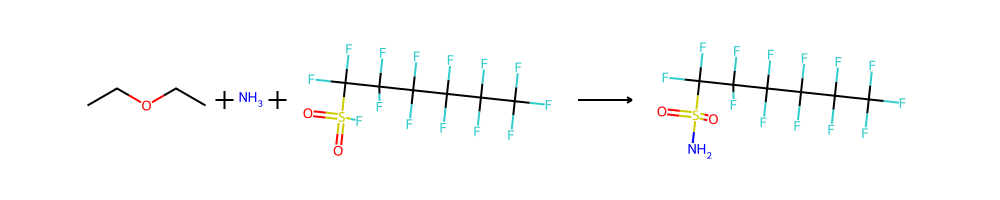

###  <span style="color: #090">Showing path </span> 5 <span style="color: #090"> with confidence </span>0.99: <br> 


<span style="color: #090"> Reaction: </span>N + O=S(=O)(Cl)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F --->> NS(=O)(=O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F <br> 


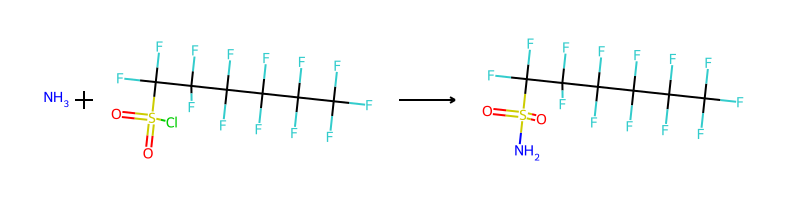

<span style="color: #090"> Reaction: </span>O=S(=O)(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F + O=S(Cl)Cl --->> O=S(=O)(Cl)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F <br> 


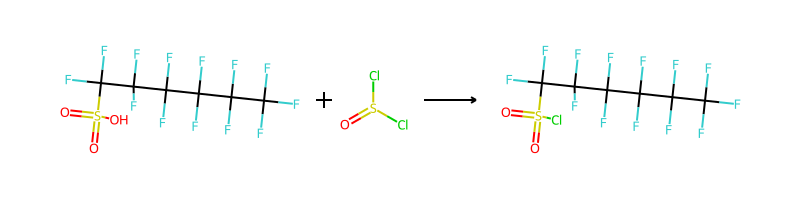

In [12]:
%openad predict retrosynthesis  'NS(=O)(=O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F'